In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use("ggplot")

import nltk

import warnings
warnings.filterwarnings("ignore")

In [3]:
df = pd.read_csv("Reviews.csv")
df.head()

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...
1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...
2,3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...
3,4,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,1307923200,Cough Medicine,If you are looking for the secret ingredient i...
4,5,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,1350777600,Great taffy,Great taffy at a great price. There was a wid...


In [5]:
df.shape

(568454, 10)

# Quick EDA

Text(0.5, 0, 'Review Stars')

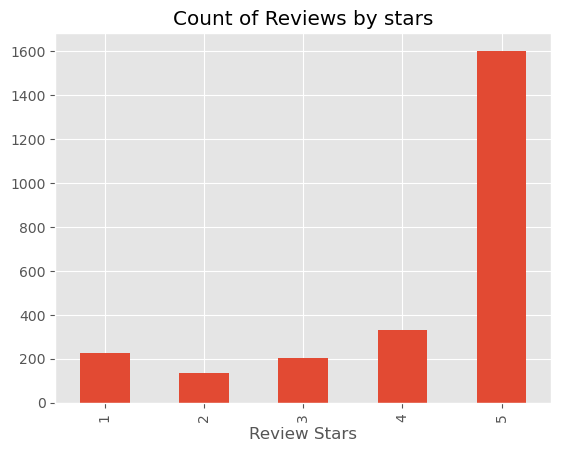

In [9]:
df = df.head(2500)
ax = df["Score"].value_counts().sort_index().plot(kind ="bar",
                                    title = "Count of Reviews by stars")
ax.set_xlabel("Review Stars")

In [ ]:
# BASIC NLTK 

In [33]:
example = df["Text"][45]
print(example)

This seems a little more wholesome than some of the supermarket brands, but it is somewhat mushy and doesn't have quite as much flavor either.  It didn't pass muster with my kids, so I probably won't buy it again.


In [16]:
nltk.download('punkt')
tokens = nltk.word_tokenize(example)
tokens

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Huawei\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


['This',
 'seems',
 'a',
 'little',
 'more',
 'wholesome',
 'than',
 'some',
 'of',
 'the',
 'supermarket',
 'brands',
 ',',
 'but',
 'it',
 'is',
 'somewhat',
 'mushy',
 'and',
 'does',
 "n't",
 'have',
 'quite',
 'as',
 'much',
 'flavor',
 'either',
 '.',
 'It',
 'did',
 "n't",
 'pass',
 'muster',
 'with',
 'my',
 'kids',
 ',',
 'so',
 'I',
 'probably',
 'wo',
 "n't",
 'buy',
 'it',
 'again',
 '.']

In [19]:
nltk.download('averaged_perceptron_tagger')
tagged = nltk.pos_tag(tokens)

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\Huawei\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


In [23]:
nltk.download('words')
nltk.download('maxent_ne_chunker')
entities = nltk.chunk.ne_chunk(tagged)
entities.pprint()

(S
  This/DT
  seems/VBZ
  a/DT
  little/RB
  more/RBR
  wholesome/JJ
  than/IN
  some/DT
  of/IN
  the/DT
  supermarket/NN
  brands/NNS
  ,/,
  but/CC
  it/PRP
  is/VBZ
  somewhat/RB
  mushy/JJ
  and/CC
  does/VBZ
  n't/RB
  have/VB
  quite/RB
  as/RB
  much/JJ
  flavor/NN
  either/RB
  ./.
  It/PRP
  did/VBD
  n't/RB
  pass/VB
  muster/NN
  with/IN
  my/PRP$
  kids/NNS
  ,/,
  so/IN
  I/PRP
  probably/RB
  wo/MD
  n't/RB
  buy/VB
  it/PRP
  again/RB
  ./.)


[nltk_data] Downloading package words to
[nltk_data]     C:\Users\Huawei\AppData\Roaming\nltk_data...
[nltk_data]   Package words is already up-to-date!
[nltk_data] Downloading package maxent_ne_chunker to
[nltk_data]     C:\Users\Huawei\AppData\Roaming\nltk_data...
[nltk_data]   Package maxent_ne_chunker is already up-to-date!


# VADER Model

In [26]:
nltk.download('vader_lexicon')
from nltk.sentiment import SentimentIntensityAnalyzer
from tqdm.notebook import tqdm

sia = SentimentIntensityAnalyzer()

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\Huawei\AppData\Roaming\nltk_data...


In [27]:
sia.polarity_scores("It was so disturbing and sinner!")

{'neg': 0.476, 'neu': 0.524, 'pos': 0.0, 'compound': -0.674}

In [29]:
sia.polarity_scores("It was disturbingly pleasant!")

{'neg': 0.384, 'neu': 0.233, 'pos': 0.384, 'compound': 0.0}

In [30]:
sia.polarity_scores("Eww!")

{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}

In [34]:
sia.polarity_scores(example)

{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}

In [36]:
res = {}
for i,row in tqdm(df.iterrows(), total = len(df)):
    text = row["Text"]
    myid = row["Id"]
    res[myid] = sia.polarity_scores(text)

  0%|          | 0/2500 [00:00<?, ?it/s]

In [37]:
res

{1: {'neg': 0.0, 'neu': 0.695, 'pos': 0.305, 'compound': 0.9441},
 2: {'neg': 0.138, 'neu': 0.862, 'pos': 0.0, 'compound': -0.5664},
 3: {'neg': 0.091, 'neu': 0.754, 'pos': 0.155, 'compound': 0.8265},
 4: {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0},
 5: {'neg': 0.0, 'neu': 0.552, 'pos': 0.448, 'compound': 0.9468},
 6: {'neg': 0.029, 'neu': 0.809, 'pos': 0.163, 'compound': 0.883},
 7: {'neg': 0.034, 'neu': 0.693, 'pos': 0.273, 'compound': 0.9346},
 8: {'neg': 0.0, 'neu': 0.52, 'pos': 0.48, 'compound': 0.9487},
 9: {'neg': 0.0, 'neu': 0.851, 'pos': 0.149, 'compound': 0.6369},
 10: {'neg': 0.0, 'neu': 0.705, 'pos': 0.295, 'compound': 0.8313},
 11: {'neg': 0.017, 'neu': 0.846, 'pos': 0.137, 'compound': 0.9746},
 12: {'neg': 0.113, 'neu': 0.887, 'pos': 0.0, 'compound': -0.7579},
 13: {'neg': 0.031, 'neu': 0.923, 'pos': 0.046, 'compound': 0.296},
 14: {'neg': 0.0, 'neu': 0.355, 'pos': 0.645, 'compound': 0.9466},
 15: {'neg': 0.104, 'neu': 0.632, 'pos': 0.264, 'compound': 0.6486},
 

In [40]:
vaders = pd.DataFrame(res).T
vaders = vaders.reset_index().rename(columns={"index":"Id"})
vaders = vaders.merge(df, how="left")

In [41]:
vaders # Now we have sentiment score and data

,Id,neg,neu,pos,compound,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
0,1,0.000,0.695,0.305,0.9441,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...
1,2,0.138,0.862,0.000,-0.5664,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...
2,3,0.091,0.754,0.155,0.8265,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...
3,4,0.000,1.000,0.000,0.0000,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,1307923200,Cough Medicine,If you are looking for the secret ingredient i...
4,5,0.000,0.552,0.448,0.9468,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,1350777600,Great taffy,Great taffy at a great price. There was a wid...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2495,2496,0.000,0.718,0.282,0.9554,B001EO6AWS,A148Z6ODSMC7SL,Atheist,1,1,3,1310860800,IT'S OK FOR SOMETHING DIFFERENT,"It doesn't have a whole lot of flavor, but mos..."
2496,2497,0.045,0.830,0.124,0.7968,B001EO6AWS,A1NZ5GYB1MXXLZ,Denise N. Davis,1,1,4,1291939200,Decent Light Roast Organic,It seems most of the organic/shade grown/fair ...
2497,2498,0.000,0.803,0.197,0.8684,B000EIE7GQ,A3NAN0AHTY46M5,M Misturado,4,4,5,1269302400,Just like the restaurant!,I recently moved and couldn't find a thai rest...
2498,2499,0.000,0.811,0.189,0.9405,B000EIE7GQ,A31Q4BB54EL7AL,Elizabeth,3,3,5,1273017600,"Authentic taste, easy to prepare!",We love to get Masaman curry at our local Thai...


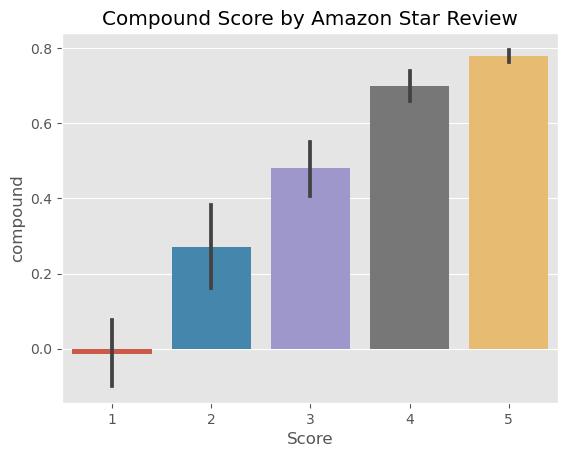

In [42]:
ax = sns.barplot(data=vaders, x ="Score",y= "compound")
ax.set_title("Compound Score by Amazon Star Review")
plt.show()

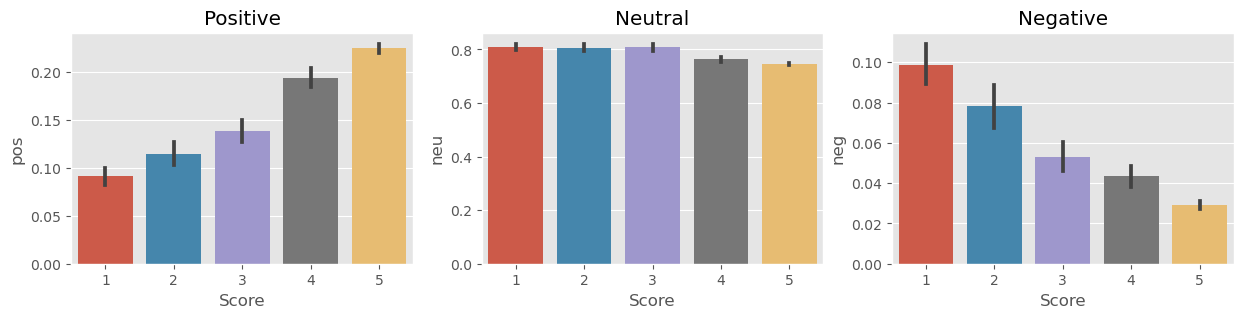

In [46]:
fig, axs = plt.subplots(1, 3, figsize=(15, 3))
sns.barplot(data=vaders, x='Score', y='pos', ax=axs[0])
sns.barplot(data=vaders, x='Score', y='neu', ax=axs[1])
sns.barplot(data=vaders, x='Score', y='neg', ax=axs[2])
axs[0].set_title('Positive')
axs[1].set_title('Neutral')
axs[2].set_title('Negative')
plt.show()

# Roberta Pretrained Model

In [60]:
!pip install transformers


In [61]:
from transformers import AutoTokenizer
from transformers import AutoModelForSequenceClassification
from scipy.special import softmax

ImportError: cannot import name 'AutoModelForSequenceClassification' from 'transformers' (C:\Users\Huawei\anaconda3\Lib\site-packages\transformers\__init__.py)

In [52]:
MODEL = f"cardiffnlp/twitter-roberta-base-sentiment"
tokenizer = AutoTokenizer.from_pretrained(MODEL)
model = AutoModelForSequenceClassification.from_pretrained(MODEL)

Unexpected exception formatting exception. Falling back to standard exception


Traceback (most recent call last):
  File "C:\Users\Huawei\anaconda3\Lib\site-packages\IPython\core\interactiveshell.py", line 3505, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "C:\Users\Huawei\AppData\Local\Temp\ipykernel_31660\1426438965.py", line 2, in <module>
    tokenizer = AutoTokenizer.from_pretrained(MODEL)
                ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\Huawei\anaconda3\Lib\site-packages\transformers\tokenization_auto.py", line 107, in from_pretrained
  File "C:\Users\Huawei\anaconda3\Lib\site-packages\transformers\tokenization_utils.py", line 282, in from_pretrained
  File "C:\Users\Huawei\anaconda3\Lib\site-packages\transformers\tokenization_utils.py", line 340, in _from_pretrained
    def _is_whitespace(char):
                    ^^^^^^^^^
OSError: Model name 'cardiffnlp/twitter-roberta-base-sentiment' was not found in tokenizers model name list (roberta-base, roberta-large, roberta-large-mnli). We assumed 'cardiffnlp/twit

In [59]:
from transformers import AutoModelForSequenceClassification

# Load the model and tokenizer
model_name = "cardiffnlp/twitter-roberta-base-sentiment"
tokenizer = AutoTokenizer.from_pretrained(model_name)
model = AutoModelForSequenceClassification.from_pretrained(model_name)

# Example text
text = "I love programming!"
inputs = tokenizer(text, return_tensors="pt")
outputs = model(**inputs)

print(outputs)


ImportError: cannot import name 'AutoModelForSequenceClassification' from 'transformers' (C:\Users\Huawei\anaconda3\Lib\site-packages\transformers\__init__.py)